<a href="https://colab.research.google.com/github/NataliaTerreno/DataScience/blob/main/6_IA_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

El Machine Learning o ML, es un método de análisis de datos que automatiza la construcción de “Modelos Analíticos”.
Es una rama de la Inteligencia Artificial, basada en la idea de que los sistemas pueden aprender de datos, identificar patrones y tomar decisiones con una mínima intervención humana.

Aprender en este contexto quiere decir, identificar patrones complejos en millones de datos.

El resurgimiento del interés en el aprendizaje basado en máquina, se debe a los volúmenes y variedades crecientes de datos disponibles, el procesamiento computacional más económico y poderoso y el almacenaje de datos asequible y mucho menos costoso. Todas estas cosas, hacen posible producir modelos de manera rápida y automática que puedan analizar datos grandes y complejos.

Con la construcción de modelos precisos, una organización tiene una mejor oportunidad de identificar oportunidades rentables o de evitar riesgos desconocidos.


### Ventajas del Machine Learning:

Mayor conocimiento de las necesidades, gustos y hábitos de compra de los clientes.
Innovación en productos y soluciones tecnológicas.
Optimización de la producción y de la productividad.
Capacidad de realizar acciones preventivas y correctivas.
Predicción de tendencias y necesidades.


### ¿Qué se requiere para crear buenos sistemas de machine learning?

- Recursos de preparación de datos.
- Algoritmos – básicos y avanzados.
- Automatización y procesos iterativos.
- Escalabilidad del Modelo en producción.



### Fases del Proyecto de Machine Learning:

- Etapa 1 - Definir el objetivo:

Es vital entender el problema a resolver, y cuáles son nuestros objetivos dados las características de la empresa, así como de la data que tendremos a disposición.
Las siguientes preguntas son típicas en esta etapa:
¿Qué exactamente deseamos hacer?
¿Cómo exactamente podremos hacerlo?
¿Es posible lo que deseo dada la data que tengo?

- Etapa 2 - Recolección de la data:

Data First Party: Data propia de la empresa (ERP,CRM,BD, etc).
Data Second Party: Suele ser data que comparte una organización con sus aliados estratégicos.
Data Third Party: Datos de tercero que podemos obtener ya sea de forma gratuita o incurriendo en algún tipo de costo asociado.

- Etapa 3 - Preparar la data:

Una vez que disponemos de la data, continuamos con el preprocesamiento de la misma, esto normalmente lo conocemos como la limpieza de los datos o el formateo del dato.
El objetivo de esta etapa es manipular y convertir la data en formas que produzcan mejores resultados. Como ejemplos típicos de preparación de datos tenemos: Eliminar o inferir datos perdidos, categorizar los valores de las variables, normalizar los valores numéricos o escalarlos para que puedan ser comparables.

- Etapa 4 - Elección del algoritmo:

Una vez que ya hemos preprocesado la data, nos corresponde elegir el algoritmo más adecuado en relación al problema que deseamos resolver.
En este punto tenemos que decidir por el Tipo de Aprendizaje que vamos a implementar.


- Etapa 5 - Entrenar el modelo:

Este paso tiene una relación directa con conceptos que abordaremos más adelante en el curso (Training y Test). Sin embargo, el proceso de entrenamiento de un modelo de ML, consiste en proporcionarle al modelo datos de entrenamiento de los cuales pueda aprender.

- Etapa 6 - Validación del modelo:

Dado que ya tenemos el modelo entrenado, lo siguiente es validarlo. Esto lo realizaremos con la data de validación y procederemos a correr el algoritmo y a evaluar los resultados obtenidos.
En el caso de que los resultados no sean satisfactorios, deberemos volver a la etapa 5 hasta que nuestro modelo se ajuste bien a las dos particiones (data de entrenamiento y data de validación).

- Etapa 7: Deployment del modelo:

Consiste en la implementación en producción de nuestro modelo. Generalmente para este paso, solemos ayudarnos de la nube a través de los 3 vendors más conocidos que existen actualmente: AWS, Azure y GCP.



# Preparación de Datos (Preprocessing & Feature Engineering) → Etapa 3

► LIMPIEZA = asegurar que los datos sean correctos
- Quitar duplicados
- Detectar outliers
- Completar o eliminar NaNs
- Corregir tipos de datos
- Eliminar columnas basura
- Corregir errores (fechas, strings, etc.)

Objetivo: Que los datos tengan calidad mínima.

Librería: Pandas

► TRANSFORMACIÓN = adaptar los datos para que el modelo aprenda mejor
- Escalar
- Normalizar
- Codificar categorías
- Transformar distribuciones (log, box-cox)
- Aplicar PCA
- One-hot encoding
- Binning

Objetivo: Hacer que el algoritmo funcione de forma óptima.

Librería: Scikit-learn, SciPy

► FEATURE ENGINEERING = crear nueva información
- Nuevas columnas
- Interacciones
- Lags, rolling windows
- Medias móviles
- Contadores
- SMOTE / Data augmentation

Objetivo: Aumentar el poder predictivo.
Librería: Pandas, sklearn, imblearn

► SELECCIÓN DE VARIABLES

Elige las mejores

Librería sklearn, eli5, árboles




### Limpieza

In [2]:
# Valores faltantes

import pandas as pd
import numpy as np

data = {
    'Cliente': ['A', 'B', 'C', 'D'],
    'Edad': [25, np.nan, 35, 40],
    'Ingresos': [50000, 60000, np.nan, 80000]
}
df = pd.DataFrame(data)

# Detectar faltantes
df.isnull().sum()

# Imputación básica
df.fillna({'Edad': df['Edad'].mean(),
           'Ingresos': df['Ingresos'].median()}, inplace=True)

# Eliminar filas con faltantes
df.dropna(inplace=True)
df

,Cliente,Edad,Ingresos
0,A,25.000000,50000.0
1,B,33.333333,60000.0
2,C,35.000000,60000.0
3,D,40.000000,80000.0


In [7]:
# Outliers (Valores extremos)

# Detección
Q1 = df['Ingresos'].quantile(0.25)
Q3 = df['Ingresos'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Ingresos'] < Q1 - 1.5 * IQR) | (df['Ingresos'] > Q3 + 1.5 * IQR)]
outliers

#Eliminarlos
df = df[~((df['Ingresos'] < Q1 - 1.5 * IQR) | (df['Ingresos'] > Q3 + 1.5 * IQR))]
df

,Cliente,Edad,Ingresos
0,A,25.000000,50000.0
1,B,33.333333,60000.0
2,C,35.000000,60000.0


In [9]:
# Duplicados

df.duplicated().sum()     # cuántos hay
df.drop_duplicates(inplace=True)
df

,Cliente,Edad,Ingresos
0,A,25.000000,50000.0
1,B,33.333333,60000.0
2,C,35.000000,60000.0


In [11]:
# Data typing (tipos de datos correctos)

# Add dummy 'Fecha' and 'Codigo' columns for demonstration purposes,
# as they were not present in the DataFrame 'df' from previous cells.
df['Fecha'] = ['2023-01-01', '2023-01-02', '2023-01-03']
df['Codigo'] = ['A1', 'B2', 'A1']

df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Codigo'] = df['Codigo'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Cliente   3 non-null      object        
 1   Edad      3 non-null      float64       
 2   Ingresos  3 non-null      float64       
 3   Fecha     3 non-null      datetime64[ns]
 4   Codigo    3 non-null      category      
dtypes: category(1), datetime64[ns](1), float64(2), object(1)
memory usage: 247.0+ bytes


### Transformación

¿Por qué hay que transformar los datos?

Porque los modelos de Machine Learning no entienden bien los datos tal como vienen.

Problemas:

- Variables con escalas muy diferentes (Edad 20 vs ingresos 1,500,000)
- Variables categóricas (Ciudad)
- Datos con distribuciones raras o sesgadas (Ingresos muy altos para unos pocos)

In [14]:
# 1. Importar librerías
# ======================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 2. Crear un DataFrame de ejemplo tipo "negocios"
# ======================================
df = pd.DataFrame({
    "Cliente": ["A", "B", "C", "D", "E"],
    "Edad": [25, 40, 35, 50, 28],
    "Ingresos": [30000, 80000, 120000, 600000, 45000],
    "Genero": ["M", "F", "F", "M", "F"],
    "Ciudad": ["Córdoba", "Buenos Aires", "Mendoza", "Córdoba", "Rosario"],
    "Nivel_estudios": ["Secundario", "Universitario", "Primario", "Secundario", "Universitario"]
})

print("🔹 DataFrame original:")
display(df)



🔹 DataFrame original:


,Cliente,Edad,Ingresos,Genero,Ciudad,Nivel_estudios
0,A,25,30000,M,Córdoba,Secundario
1,B,40,80000,F,Buenos Aires,Universitario
2,C,35,120000,F,Mendoza,Primario
3,D,50,600000,M,Córdoba,Secundario
4,E,28,45000,F,Rosario,Universitario


In [16]:
# 3. Escalado de variables numéricas → Es poner todas las variables en un rango similar, para que ningún número domine a otro.
# ======================================

# 👉 StandardScaler: media=0, desvío estándar=1 → Mantiene forma de los datos, pero los estandariza.
scaler_std = StandardScaler()
df[["Edad_std", "Ingresos_std"]] = scaler_std.fit_transform(df[["Edad", "Ingresos"]])

# 👉 MinMaxScaler: escala entre 0 y 1 → (común en redes neuronales)
scaler_mm = MinMaxScaler()
df[["Edad_mm", "Ingresos_mm"]] = scaler_mm.fit_transform(df[["Edad", "Ingresos"]])

print("🔹 Con escalado aplicado:")
display(df)


🔹 Con escalado aplicado:


,Cliente,Edad,Ingresos,Genero,Ciudad,Nivel_estudios,Edad_std,Ingresos_std,Edad_mm,Ingresos_mm
0,A,25,30000,M,Córdoba,Secundario,-1.189286,-0.675186,0.00,0.000000
1,B,40,80000,F,Buenos Aires,Universitario,0.493666,-0.442363,0.60,0.087719
2,C,35,120000,F,Mendoza,Primario,-0.067318,-0.256105,0.40,0.157895
3,D,50,600000,M,Córdoba,Secundario,1.615634,1.978993,1.00,1.000000
4,E,28,45000,F,Rosario,Universitario,-0.852696,-0.605339,0.12,0.026316


In [17]:
# 📌 4. Codificación de variables categóricas
# ======================================

# 👉 LabelEncoder → para variables binarias o de una sola columna
le = LabelEncoder()
df["Genero_encoded"] = le.fit_transform(df["Genero"])  # M=1, F=0

# 👉 One-Hot Encoding (para Ciudad)
df_ohe = pd.get_dummies(df, columns=["Ciudad"], drop_first=True)

print("🔹 Con codificación aplicada:")
display(df_ohe)

# 👉 OrdinalEncoder para variables con orden lógico (Ej: Primario < Secundario < Universitario)
orden = OrdinalEncoder(categories=[["Primario", "Secundario", "Universitario"]])
df_ohe["Nivel_encoded"] = orden.fit_transform(df[["Nivel_estudios"]])

display(df_ohe)


🔹 Con codificación aplicada:


,Cliente,Edad,Ingresos,Genero,Nivel_estudios,Edad_std,Ingresos_std,Edad_mm,Ingresos_mm,Genero_encoded,Ciudad_Córdoba,Ciudad_Mendoza,Ciudad_Rosario
0,A,25,30000,M,Secundario,-1.189286,-0.675186,0.00,0.000000,1,True,False,False
1,B,40,80000,F,Universitario,0.493666,-0.442363,0.60,0.087719,0,False,False,False
2,C,35,120000,F,Primario,-0.067318,-0.256105,0.40,0.157895,0,False,True,False
3,D,50,600000,M,Secundario,1.615634,1.978993,1.00,1.000000,1,True,False,False
4,E,28,45000,F,Universitario,-0.852696,-0.605339,0.12,0.026316,0,False,False,True


,Cliente,Edad,Ingresos,Genero,Nivel_estudios,Edad_std,Ingresos_std,Edad_mm,Ingresos_mm,Genero_encoded,Ciudad_Córdoba,Ciudad_Mendoza,Ciudad_Rosario,Nivel_encoded
0,A,25,30000,M,Secundario,-1.189286,-0.675186,0.00,0.000000,1,True,False,False,1.0
1,B,40,80000,F,Universitario,0.493666,-0.442363,0.60,0.087719,0,False,False,False,2.0
2,C,35,120000,F,Primario,-0.067318,-0.256105,0.40,0.157895,0,False,True,False,0.0
3,D,50,600000,M,Secundario,1.615634,1.978993,1.00,1.000000,1,True,False,False,1.0
4,E,28,45000,F,Universitario,-0.852696,-0.605339,0.12,0.026316,0,False,False,True,2.0


In [19]:
# 📌 5. Transformación Logarítmica
# Ideal para valores muy grandes o sesgados (Ingresos)
# ======================================
df_ohe["Ingresos_log"] = np.log(df_ohe["Ingresos"])

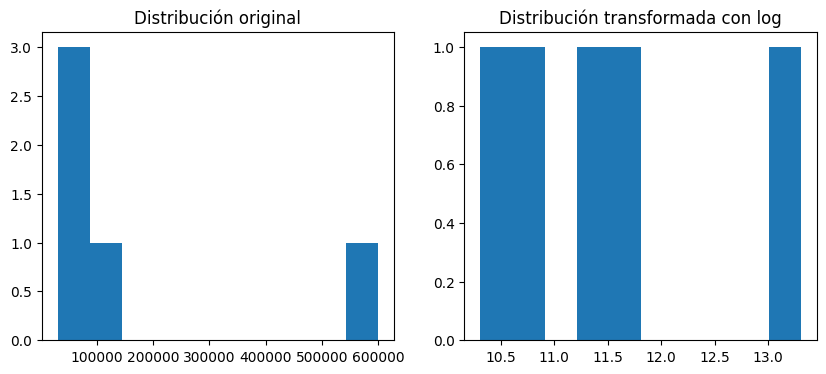

In [21]:
# Visualización para comparar antes y después
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["Ingresos"])
plt.title("Distribución original")

plt.subplot(1,2,2)
plt.hist(df_ohe["Ingresos_log"])
plt.title("Distribución transformada con log")
plt.show()

In [22]:
print("🔹 DataFrame final con todas las transformaciones:")
display(df_ohe)

🔹 DataFrame final con todas las transformaciones:


,Cliente,Edad,Ingresos,Genero,Nivel_estudios,Edad_std,Ingresos_std,Edad_mm,Ingresos_mm,Genero_encoded,Ciudad_Córdoba,Ciudad_Mendoza,Ciudad_Rosario,Nivel_encoded,Ingresos_log
0,A,25,30000,M,Secundario,-1.189286,-0.675186,0.00,0.000000,1,True,False,False,1.0,10.308953
1,B,40,80000,F,Universitario,0.493666,-0.442363,0.60,0.087719,0,False,False,False,2.0,11.289782
2,C,35,120000,F,Primario,-0.067318,-0.256105,0.40,0.157895,0,False,True,False,0.0,11.695247
3,D,50,600000,M,Secundario,1.615634,1.978993,1.00,1.000000,1,True,False,False,1.0,13.304685
4,E,28,45000,F,Universitario,-0.852696,-0.605339,0.12,0.026316,0,False,False,True,2.0,10.714418


### Feature Engineering

In [24]:
# Crear nuevas variables
df['Ingreso_mensual'] = df['Ingresos'] / 12
df['Edad_Ingresos_ratio'] = df['Ingresos'] / df['Edad']
df

,Cliente,Edad,Ingresos,Genero,Ciudad,Nivel_estudios,Edad_std,Ingresos_std,Edad_mm,Ingresos_mm,Genero_encoded,Ingreso_mensual,Edad_Ingresos_ratio
0,A,25,30000,M,Córdoba,Secundario,-1.189286,-0.675186,0.00,0.000000,1,2500.000000,1200.000000
1,B,40,80000,F,Buenos Aires,Universitario,0.493666,-0.442363,0.60,0.087719,0,6666.666667,2000.000000
2,C,35,120000,F,Mendoza,Primario,-0.067318,-0.256105,0.40,0.157895,0,10000.000000,3428.571429
3,D,50,600000,M,Córdoba,Secundario,1.615634,1.978993,1.00,1.000000,1,50000.000000,12000.000000
4,E,28,45000,F,Rosario,Universitario,-0.852696,-0.605339,0.12,0.026316,0,3750.000000,1607.142857


In [26]:
# Interacciones entre variables
df['Ingreso_Edad_interaccion'] = df['Ingresos'] * df['Edad']
df

,Cliente,Edad,Ingresos,Genero,Ciudad,Nivel_estudios,Edad_std,Ingresos_std,Edad_mm,Ingresos_mm,Genero_encoded,Ingreso_mensual,Edad_Ingresos_ratio,Ingreso_Edad_interaccion
0,A,25,30000,M,Córdoba,Secundario,-1.189286,-0.675186,0.00,0.000000,1,2500.000000,1200.000000,750000
1,B,40,80000,F,Buenos Aires,Universitario,0.493666,-0.442363,0.60,0.087719,0,6666.666667,2000.000000,3200000
2,C,35,120000,F,Mendoza,Primario,-0.067318,-0.256105,0.40,0.157895,0,10000.000000,3428.571429,4200000
3,D,50,600000,M,Córdoba,Secundario,1.615634,1.978993,1.00,1.000000,1,50000.000000,12000.000000,30000000
4,E,28,45000,F,Rosario,Universitario,-0.852696,-0.605339,0.12,0.026316,0,3750.000000,1607.142857,1260000


In [28]:
# Agregaciones por grupo

df.groupby('Ciudad')['Ingresos'].mean()

,Ingresos
Ciudad,
Buenos Aires,80000.0
Córdoba,315000.0
Mendoza,120000.0
Rosario,45000.0


In [32]:
# Ventanas deslizantes (Time Series)

df['Ingresos_rolling_mean'] = df['Ingresos'].rolling(window=3).mean()
df

,Cliente,Edad,Ingresos,Genero,Ciudad,Nivel_estudios,Edad_std,Ingresos_std,Edad_mm,Ingresos_mm,Genero_encoded,Ingreso_mensual,Edad_Ingresos_ratio,Ingreso_Edad_interaccion,Ingresos_rolling_mean
0,A,25,30000,M,Córdoba,Secundario,-1.189286,-0.675186,0.00,0.000000,1,2500.000000,1200.000000,750000,NaN
1,B,40,80000,F,Buenos Aires,Universitario,0.493666,-0.442363,0.60,0.087719,0,6666.666667,2000.000000,3200000,NaN
2,C,35,120000,F,Mendoza,Primario,-0.067318,-0.256105,0.40,0.157895,0,10000.000000,3428.571429,4200000,76666.666667
3,D,50,600000,M,Córdoba,Secundario,1.615634,1.978993,1.00,1.000000,1,50000.000000,12000.000000,30000000,266666.666667
4,E,28,45000,F,Rosario,Universitario,-0.852696,-0.605339,0.12,0.026316,0,3750.000000,1607.142857,1260000,255000.000000


In [35]:
# Generación Sintética (SMOTE) →

# Es una técnica que se usa cuando tu variable objetivo (y) está desbalanceada, es decir, cuando hay muchas más muestras de una clase que de otra.
# SMOTE genera nuevos datos sintéticos (artificiales pero realistas), solo para la clase minoritaria (la que tiene pocos datos) para que el modelo tiene suficientes ejemplos para aprender cómo luce la clase minoritaria.

# Útil para datos desbalanceados (fraude, churn).

from imblearn.over_sampling import SMOTE
# X_res, y_res = SMOTE().fit_resample(X, y) # This line will cause a NameError as X and y are not defined

# No usar SMOTE antes de dividir en train/test (porque contamina los datos)
# Primero dividir: train_test_split() → luego aplicar SMOTE solo sobre el set de entrenamiento.

### Selección de variables

En Machine Learning no todas las variables suman valor. Algunas son irrelevantes, otras redundantes y otras generan ruido o sesgo.
Por eso, antes de entrenar un modelo, hacemos Selección de Variables para quedarnos con las más útiles y predictivas.

| Método   | Velocidad | Precisión   | Basado en Modelo | Ideal para       |
| -------- | --------- | ----------- | ---------------- | ---------------- |
| Filter   | 🚀 Rápido | 😊 Medio    | ❌ No             | Pre-filtrado     |
| Wrapper  | 🐢 Lento  | 🚀 Alto     | ✔ Sí             | Modelos pequeños |
| Embedded | ⚖️ Medio  | 🚀 Muy alto | ✔ Sí             | ML profesional   |


In [37]:
# Filter

# 📌 Importaciones básicas
import pandas as pd
import numpy as np

# Dataset de ejemplo
data = {
    'Edad': [25, 32, 47, 51, 62, 40, 36],
    'Ingresos': [2000, 3500, 5000, 6000, 7000, 4500, 4000],
    'Nivel_Estudio': [1, 2, 3, 3, 4, 2, 2],
    'Compra': [0, 1, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# 📊 Matriz de correlación
corr = df.corr(numeric_only=True)
print("🔎 Matriz de correlación:")
print(corr)

# Chi-cuadrado (Chi²) – para categóricas
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

# Escalado porque Chi² requiere valores positivos
X = df[['Edad', 'Ingresos', 'Nivel_Estudio']]
y = df['Compra']
X_scaled = MinMaxScaler().fit_transform(X)

# Aplicamos Chi²
selector = SelectKBest(chi2, k=2)
selector.fit(X_scaled, y)

print("📌 Scores Chi²:")
print(selector.scores_)

🔎 Matriz de correlación:
                   Edad  Ingresos  Nivel_Estudio    Compra
Edad           1.000000  0.987438       0.977279  0.512094
Ingresos       0.987438  1.000000       0.964685  0.549128
Nivel_Estudio  0.977279  0.964685       1.000000  0.650000
Compra         0.512094  0.549128       0.650000  1.000000
📌 Scores Chi²:
[0.39306001 0.38027778 0.56333333]


In [38]:
# Wrapper Methods

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df[['Edad', 'Ingresos', 'Nivel_Estudio']]
y = df['Compra']

model = LogisticRegression()

# RFE: seleccionamos las 2 mejores variables
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)

print("🎯 Variables seleccionadas por RFE:")
for col, selected in zip(X.columns, rfe.support_):
    print(f"{col}: {'✔️ Importante' if selected else '❌ Eliminada'}")

🎯 Variables seleccionadas por RFE:
Edad: ✔️ Importante
Ingresos: ❌ Eliminada
Nivel_Estudio: ✔️ Importante


In [40]:
# Embedded Methods

# Usando Lasso (L1 Regularization)
from sklearn.linear_model import Lasso
import numpy as np

X = df[['Edad', 'Ingresos', 'Nivel_Estudio']]
y = df['Compra']

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

print("📎 Coeficientes Lasso:")
for col, coef in zip(X.columns, lasso.coef_):
    print(f"{col}: {coef}")

# Feature Importance con Árboles
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_

print("🌲 Importancia según Random Forest:")
for col, imp in zip(X.columns, importances):
    print(f"{col}: {imp}")

📎 Coeficientes Lasso:
Edad: -0.0169051154962051
Ingresos: 0.000289703553191811
Nivel_Estudio: 0.0
🌲 Importancia según Random Forest:
Edad: 0.37217487373737373
Ingresos: 0.31848169191919184
Nivel_Estudio: 0.3093434343434344


# Tipos de Aprendizajes para entrenar Algoritmos

Un algoritmo es una secuencia ordenada de pasos lógicos y finitos, que permiten resolver un problema o realizar una tarea (Automatizar, optimizar y estructurar soluciones).

Dentro de cada tipo de aprendizaje existen algoritmos específicos.


| Tipo de Aprendizaje                                   | ¿Qué hace?                                                                                        | ¿Cuándo se usa?                                                                | Técnicas / Ejemplos                                                |
| ----------------------------------------------------- | ------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------ | ------------------------------------------------------------------ |
| **Supervisado**                                       | Aprende a partir de datos **etiquetados** (con respuesta correcta). Predice valores o categorías. | Cuando sabés qué querés predecir (precio, clase, riesgo, spam).                | Regresión lineal, Árboles de decisión, Random Forest, SVM, XGBoost |
| **No supervisado**                                    | Descubre **patrones ocultos, segmentos o estructuras** en datos sin etiquetas.                    | Cuando querés explorar, agrupar, reducir dimensionalidad o detectar anomalías. | K-Means, DBSCAN, PCA, t-SNE, Isolation Forest, GMM                 |
| **Semi-supervisado**                                  | Combina pocos datos **etiquetados** y muchos **no etiquetados** para mejorar el aprendizaje.      | Situaciones donde etiquetar es costoso (imágenes médicas, audios, documentos). | Self-Training, Label Propagation, Semi-Supervised GANs             |
| **Por refuerzo (Reinforcement Learning)**             | Aprende mediante **prueba y error**, recibiendo recompensas por buenas decisiones.                | Juegos, robótica, optimización de procesos, autos autónomos.                   | Q-Learning, Deep Q-Network (DQN), AlphaZero, A3C                   |
| **AutoML / Aprendizaje Automático Automatizado**      | Automatiza tareas como selección de modelo, tuning, entrenamiento y evaluación.                   | Cuando se busca eficiencia y menos intervención humana.                        | Auto-Sklearn, AutoKeras, Google AutoML                             |
| **Aprendizaje por transferencia (Transfer Learning)** | Usa un modelo ya entrenado y lo adapta a un nuevo problema similar.                               | Procesamiento de imágenes, voz, lenguaje natural con pocos datos.              | BERT, ResNet, CLIP, GPT                                            |
| **Aprendizaje federado (Federated Learning)**         | Entrena modelos en múltiples dispositivos **sin compartir datos**, protegiendo la privacidad.     | Salud, smartphones, bancos, IoT.                                               | FedAvg, Google’s FL framework                                      |
| **Self-Supervised Learning**                          | Aprende creando sus propias etiquetas desde los datos sin supervisión externa.                    | Vision, NLP, audio, preentrenamiento de modelos grandes.                       | SimCLR, MoCo, GPT, BERT                                            |

DEEP LEARNING

- NO es un tipo de aprendizaje
- Es un tipo de algoritmo que forma parte del Aprendizaje Supervisado, No Supervisado y por Refuerzo, pero con redes neuronales profundas.
- Es un subconjunto dentro del Machine Learning, pero con modelos más complejos (redes neuronales profundas).



## Supervisado


### Clasificación

#### Regresión Logística


#### Naïve Bayes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### KNN

#### Decision Trees (CART)

#### Random Forest


#### SVM (kernel trick)


#### Gradient Boosting

##### AdaBoost


##### Gradient Boosting

##### XGBoost


##### LightGBM

##### CatBoost

## No supervisado

## Semi-supervisado

## Por refuerzo

## AutoML

## Transfer Learning

## Federated Learning

## Self-Supervised Learning